<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-06-01 19:08:35--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.11’

survey-data.csv.11  100%[===================>] 152.13M  64.1MB/s    in 2.4s    

2025-06-01 19:08:39 (64.1 MB/s) - ‘survey-data.csv.11’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()

,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)

,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])

CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


In [10]:
QUERY = """ SELECT * FROM main """
data = pd.read_sql_query(QUERY,conn)

In [11]:
df = data.copy()

In [12]:
# DATA WRANGLING

import numpy as np

# Add Age_Median column
age_map = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Median'] = df['Age'].map(age_map)

# Add MainBranch_Type column
mainbranch_map = {
    'I am a developer by profession': 'Professional',
    'I am learning to code': 'Learner',
    'I code primarily as a hobby': 'Hobbyist',
    'I am not primarily a developer, but I write code sometimes as part of my work/studies': 'Occasional',
    'I used to be a developer by profession, but no longer am': 'Former Professional'
}
df['MainBranch_Type'] = df['MainBranch'].map(mainbranch_map)

# Add TimeSearching_Median column
timesearching_map = {
    'Less than 15 minutes a day': 7,
    '15-30 minutes a day': 22,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 121
}
df['TimeSearching_Median'] = df['TimeSearching'].map(timesearching_map)
df['TimeSearching_Median'] = pd.to_numeric(df['TimeSearching_Median'], errors='coerce')

# Convert YearsCodePro to number
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year' : 17,
    'More than 50 years' : 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Add YearsCodePro_Level column
def convert_experience(val):
    if val == 'None' or pd.isna(val):
        return np.nan
    if val <= 2:
        return 'Beginner (0-2)'
    elif val <= 5:
        return 'Junior (3-5)'
    elif val <= 10:
        return 'Mid (6-10)'
    elif val <= 20:
        return 'Senior (11-20)'
    else:
        return 'Veteran (21+)'
df['YearsCodePro_Level'] = df['YearsCodePro'].apply(convert_experience)

# Add JobSatPoints_6_Level column
def categorize_jobsat(val):
    if pd.isna(val):
        return np.nan
    elif val <= 14:
        return 'Very Low (0–14)'
    elif val <= 29:
        return 'Low (15–29)'
    elif val <= 44:
        return 'Fair (30–44)'
    elif val <= 59:
        return 'Moderate (45–59)'
    elif val <= 74:
        return 'High (60–74)'
    elif val <= 89:
        return 'Very High (75–89)'
    else:
        return 'Extremely High (90+)'
df['JobSatPoints_6_Level'] = df['JobSatPoints_6'].apply(categorize_jobsat)

# Standardize Country column
country_mapping = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Iran, Islamic Republic of...': 'Iran',
    'Republic of North Macedonia': 'North Macedonia',
    'United Republic of Tanzania': 'Tanzania',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    'Bosnia and Herzegovina': 'Bosnia',
    'Hong Kong (S.A.R.)': 'Hong Kong',
    "Lao People's Democratic Republic": 'Laos',
    'Democratic Republic of the Congo': 'DR Congo',
    "Côte d'Ivoire": "Ivory Coast",
    "Democratic People's Republic of Korea": 'North Korea',
    'Congo, Republic of the...': 'Republic of Congo',
    'Guinea-Bissau': 'Guinea-Bissau',
    'Central African Republic': 'CAR',
    'Libyan Arab Jamahiriya': 'Libya',
    'Saint Kitts and Nevis': 'St. Kitts & Nevis',
    'Micronesia, Federated States of...': 'Micronesia'
}
df['Country'] = df['Country'].replace(country_mapping)

# Standardize EdLevel column
edlevel_mapping = {
    'Primary/elementary school': 'Primary School',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'High School',
    'Some college/university study without earning a degree': 'Some College',
    'Associate degree (A.A., A.S., etc.)': 'Associate Degree',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s Degree',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s Degree',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Doctorate or Professional Degree',
    'Something else': 'Other'
}
df['EdLevel'] = df['EdLevel'].replace(edlevel_mapping)

### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [13]:
# Check CompTotal
df['CompTotal'].describe()

count     3.374000e+04
mean     2.963841e+145
std      5.444117e+147
min       0.000000e+00
25%       6.000000e+04
50%       1.100000e+05
75%       2.500000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64

In [14]:
cols = ['CompTotal']
df_hist = df[cols].dropna().reset_index(drop=True)
df_hist = df_hist[df_hist['CompTotal'] < df_hist['CompTotal'].median()] # remove outlier
df_hist.head()

,CompTotal
1,28000.0
2,85000.0
3,50000.0
6,95000.0
8,35000.0


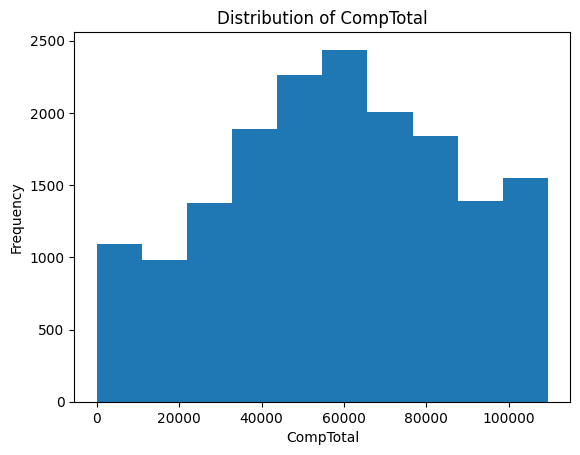

In [15]:
plt.hist(df_hist, bins = 10)
plt.title('Distribution of CompTotal')
plt.xlabel('CompTotal')
plt.ylabel('Frequency')
plt.show()

**Box Plots**

Plot a box plot of Age.


In [16]:
df['Age_Median'].unique()

array([10., 40., 50., 20., 30., 60., nan, 70.])

In [17]:
cols = ['Age_Median']
df_box = df[cols].dropna().reset_index(drop=True)
df_box.head()

,Age_Median
0,10.0
1,40.0
2,50.0
3,20.0
4,20.0


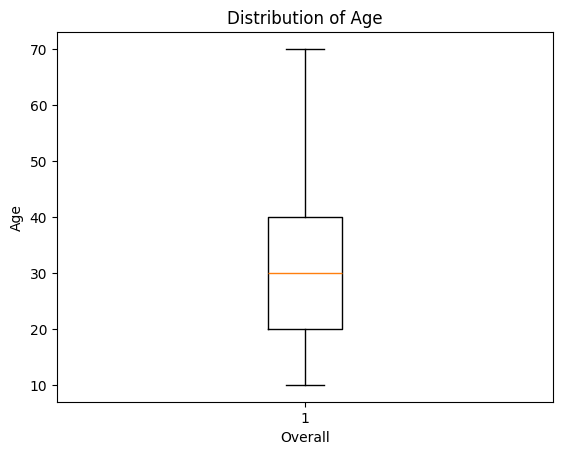

In [18]:
plt.boxplot(df_box['Age_Median'])
plt.title('Distribution of Age')
plt.xlabel('Overall')
plt.ylabel('Age')
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


In [19]:
cols = ['Age_Median', 'WorkExp']
df_scat = df[cols].dropna().reset_index(drop=True)
df_scat.head()

,Age_Median,WorkExp
0,40.0,17.0
1,40.0,15.0
2,40.0,12.0
3,50.0,29.0
4,30.0,12.0


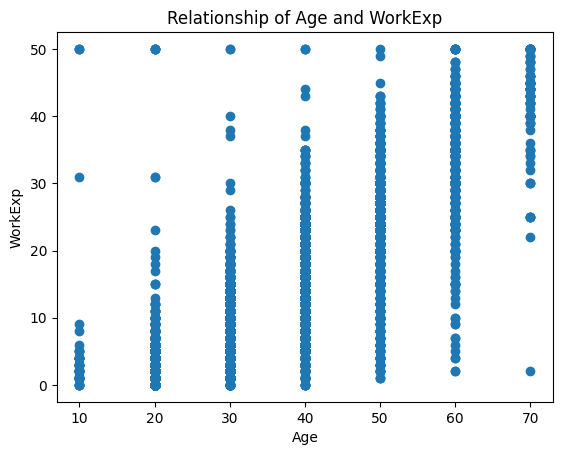

In [20]:
plt.scatter(df_scat['Age_Median'], df_scat['WorkExp'])
plt.title('Relationship of Age and WorkExp')
plt.xlabel('Age')
plt.ylabel('WorkExp')
plt.show()

**Bubble Plots**

Create a bubble plot of `CompTotal` and `WorkExp` using the `Age` column as the bubble size.


In [21]:
cols = ['Age_Median', 'WorkExp', 'CompTotal']
df_bub = df[cols].dropna().reset_index(drop=True)
df_bub = df_bub[df_bub['CompTotal'] < df_bub['CompTotal'].median()] # remove outlier
df_bub.head()

,Age_Median,WorkExp,CompTotal
1,40.0,7.0,85000.0
5,40.0,16.0,74000.0
7,30.0,1.0,27000.0
8,30.0,4.0,62000.0
9,60.0,30.0,80000.0


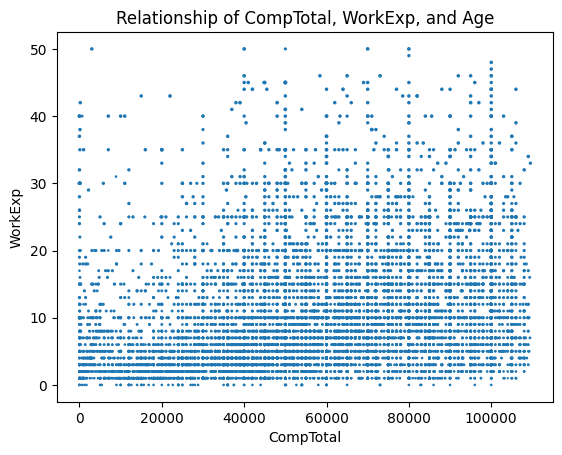

In [22]:
plt.scatter(df_bub['CompTotal'], df_bub['WorkExp'], s=df_bub['Age_Median']/25) # scale bubble size
plt.title('Relationship of CompTotal, WorkExp, and Age')
plt.xlabel('CompTotal')
plt.ylabel('WorkExp')
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [23]:
cols = ['DatabaseWantToWorkWith']
df_pie = df[cols].dropna().value_counts().head(10).reset_index()
df_pie.head()

,DatabaseWantToWorkWith,count
0,PostgreSQL,3738
1,PostgreSQL;SQLite,1533
2,SQLite,1476
3,Microsoft SQL Server,1431
4,MySQL,1139


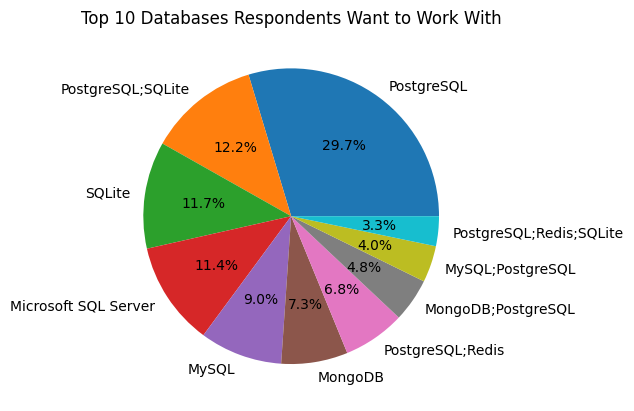

In [24]:
plt.pie(df_pie['count'], labels=df_pie['DatabaseWantToWorkWith'], autopct='%1.1f%%')
plt.title("Top 10 Databases Respondents Want to Work With")
plt.show()

**Stacked Charts** 

Create a stacked bar chart of `TimeSearching` and `TimeAnswering` for the age group 30 to 35.

In [25]:
cols = ['TimeSearching', 'TimeAnswering']
df_stk = df[(df['Age_Median'] >= 30) & (df['Age_Median'] <= 35)] # filter age group
df_stk = df_stk[cols].dropna()
# crosstab for stack plot
df_stk = pd.crosstab(df_stk['TimeSearching'], df_stk['TimeAnswering'])
df_stk.head()

TimeAnswering,15-30 minutes a day,30-60 minutes a day,60-120 minutes a day,Less than 15 minutes a day,Over 120 minutes a day
TimeSearching,,,,,
15-30 minutes a day,1261,911,283,802,51
30-60 minutes a day,1672,1620,619,833,127
60-120 minutes a day,706,825,390,298,108
Less than 15 minutes a day,329,188,68,431,23
Over 120 minutes a day,243,277,172,134,148


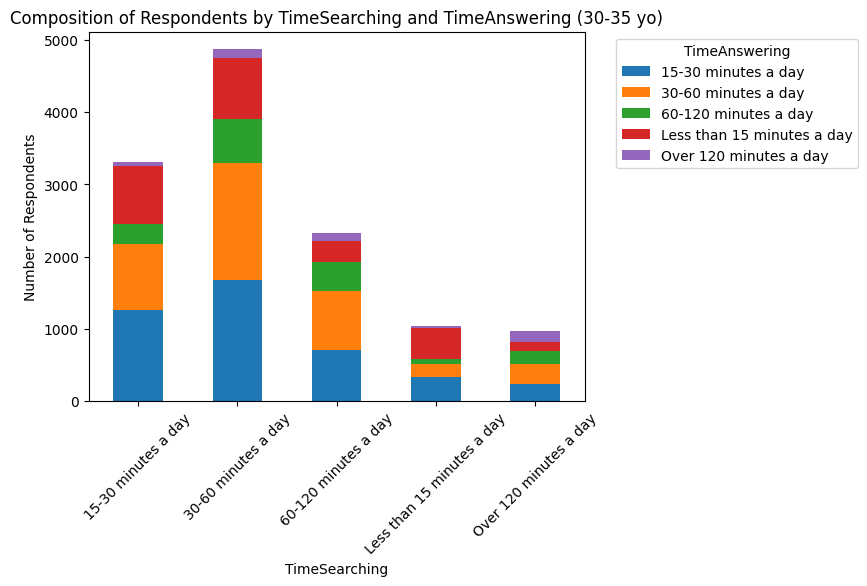

In [26]:
df_stk.plot(kind='bar', stacked=True)
plt.title('Composition of Respondents by TimeSearching and TimeAnswering (30-35 yo)')
plt.xlabel('TimeSearching')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='TimeAnswering', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [27]:
cols = ['Age_Median', 'CompTotal']
df_line = df[(df['Age_Median'] >= 45) & (df['Age_Median'] <= 60)] # filter age group
df_line = df_line[cols].dropna()
# group for median line plot
df_line = df_line.groupby('Age_Median')['CompTotal'].median().reset_index()
df_line

,Age_Median,CompTotal
0,50.0,130000.0
1,60.0,135000.0


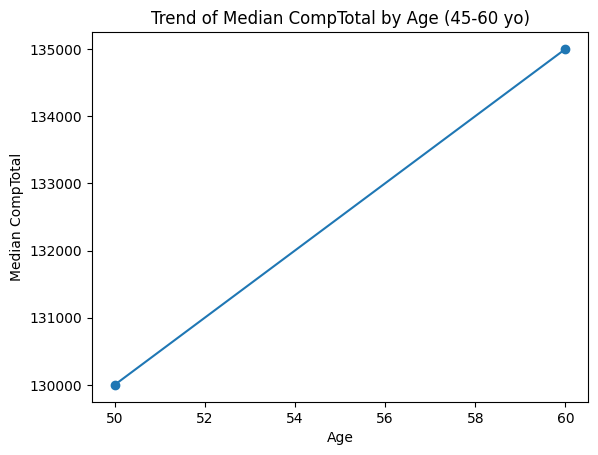

In [28]:
plt.plot(df_line['Age_Median'], df_line['CompTotal'], marker='o')
plt.title('Trend of Median CompTotal by Age (45-60 yo)')
plt.xlabel('Age')
plt.ylabel('Median CompTotal')
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [29]:
df['MainBranch_Type'].unique()

array(['Professional', 'Learner', 'Hobbyist', 'Occasional',
       'Former Professional'], dtype=object)

In [30]:
cols = ['MainBranch_Type']
df_bar = df[cols].dropna().value_counts().sort_values().reset_index()
df_bar.head()

,MainBranch_Type,count
0,Former Professional,1510
1,Hobbyist,3334
2,Learner,3875
3,Occasional,6511
4,Professional,50207


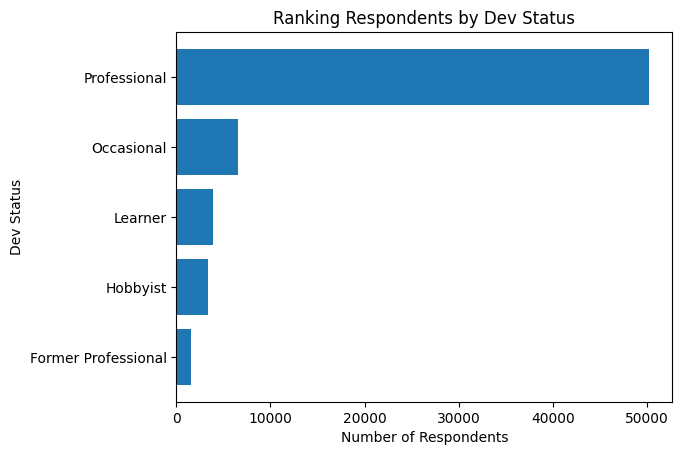

In [31]:
plt.barh(df_bar['MainBranch_Type'], df_bar['count'])
plt.title('Ranking Respondents by Dev Status')
plt.xlabel('Number of Respondents')
plt.ylabel('Dev Status')
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [32]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
